<a href="https://colab.research.google.com/github/easeandrelax/blood-sugar-level/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


🔹 Why Mount Google Drive?
Persistent Storage – Files in /content (Colab's default directory) get deleted after the session ends, but Google Drive keeps your files safe.

Easy File Access – Instead of re-uploading files every time, you can store them in Drive and load them whenever needed.

Handling Large Datasets – If you're working with large files (like images or CSVs), storing them in Drive prevents running out of Colab's limited storage.

Syncing with Other Devices – You can access the same files from different devices without re-downloading them.

In [ ]:
import os

image_folder = "/content/drive/MyDrive/train_images"
image_files = os.listdir(image_folder)

print(f"Total images found: {len(image_files)}")
print(image_files)  # Show first 10 images


Total images found: 3
['train_images', 'train.gsheet', 'train.csv']


In [ ]:
import glob

train_dir = "/content/drive/MyDrive/train_images"
image_count = len(glob.glob(train_dir + "/*.[jp][pn]g"))  # Counts JPG, JPEG, PNG
print("Number of images:", image_count)



Number of images: 0


In [ ]:
image_list = !ls /content/drive/MyDrive/train_images
image_count = len(image_list)
print("Number of images:", image_count)


Number of images: 1


In [ ]:
csv_path = "/content/drive/MyDrive/train_images/train.csv"
if os.path.exists(csv_path):
    print("✅ CSV file found!")
else:
    print("❌ CSV file missing. Please upload it.")


✅ CSV file found!


In [ ]:
import pandas as pd

# Get list of image files
image_files = os.listdir(image_folder)

# Create a DataFrame with filenames and random labels (modify labels accordingly)
df = pd.DataFrame({"Image Name": image_files, "Label": ["class_1"] * len(image_files)})

# Save CSV in Drive
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df.to_csv(csv_path, index=False)

print(f"✅ CSV file created and saved at: {csv_path}")


✅ CSV file created and saved at: /content/drive/MyDrive/train_images/train.csv


In [ ]:
import pandas as pd

CSV_PATH = "/content/drive/MyDrive/train_images/train.csv"
df = pd.read_csv(CSV_PATH)

print("✅ CSV File Loaded Successfully!")
print(df.head())  # Display the first few rows


✅ CSV File Loaded Successfully!
     Image Name    Label
0  train_images  class_1
1  train.gsheet  class_1
2     train.csv  class_1


Step 1: Load and Preprocess Data

In [ ]:
!ls /content/drive/MyDrive/train_images



train.csv  train.gsheet  train_images


In [ ]:
!ls /content/drive/MyDrive/train_images

train.csv  train.gsheet  train_images


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset_path = "/content/drive/MyDrive/train_images/"
csv_path = "/content/drive/MyDrive/train_images/train.csv"  # Update with actual file path

# Load CSV
df = pd.read_csv(csv_path)
df['image_path'] = dataset_path + df['Image Name']  # Full path to images

# Show dataset preview
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Image Name    Label                                        image_path
0  train_images  class_1  /content/drive/MyDrive/train_images/train_images
1  train.gsheet  class_1  /content/drive/MyDrive/train_images/train.gsheet
2     train.csv  class_1     /content/drive/MyDrive/train_images/train.csv


 Preprocess Images for Regression Model

In [ ]:
image_path = '/content/drive/MyDrive/train_images'
IMG_SIZE = (224, 224)

# Function to load images and normalize them
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array

# Load all images into memory
X = np.array([load_and_preprocess_image(img) for img in df['image_path']])
y = np.array(df['Blood Sugar Level'])  # Target values

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/train_images/train_images'

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import UnidentifiedImageError  # Import for handling the specific error

# ... (rest of your code)
image_path = 'content/drive/MyDrive/train_images'

# Function to load images and normalize them, with error handling
def load_and_preprocess_image(image_path):
    try:
        img = load_img(image_path, target_size=IMG_SIZE)
        img_array = img_to_array(img) / 255.0  # Normalize
        return img_array
    except (FileNotFoundError, UnidentifiedImageError, OSError) as e:
        print(f"Error loading image {image_path}: {e}")
        return None  # or handle the error differently (e.g., skip the image)

# Load all images into memory, filtering out failed loads
X = np.array([img for img in [load_and_preprocess_image(img_path) for img_path in df['image_path']] if img is not None])
# Update target values to match the filtered images
valid_indices = [i for i, img in enumerate([load_and_preprocess_image(img_path) for img_path in df['image_path']]) if img is not None]
y = np.array(df['Blood Sugar Level'][valid_indices])  # Target values

# ... (rest of your code)

Error loading image /content/drive/MyDrive/train_images/train_images: [Errno 21] Is a directory: '/content/drive/MyDrive/train_images/train_images'
Error loading image /content/drive/MyDrive/train_images/train.gsheet: [Errno 95] Operation not supported: '/content/drive/MyDrive/train_images/train.gsheet'
Error loading image /content/drive/MyDrive/train_images/train.csv: cannot identify image file <_io.BytesIO object at 0x7f60fdfa5a80>
Error loading image /content/drive/MyDrive/train_images/train_images: [Errno 21] Is a directory: '/content/drive/MyDrive/train_images/train_images'
Error loading image /content/drive/MyDrive/train_images/train.gsheet: [Errno 95] Operation not supported: '/content/drive/MyDrive/train_images/train.gsheet'
Error loading image /content/drive/MyDrive/train_images/train.csv: cannot identify image file <_io.BytesIO object at 0x7f61a0b6d1c0>


KeyError: 'Blood Sugar Level'

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import UnidentifiedImageError

# Define image size
IMG_SIZE = (224, 224)  # Resize images to 224x224

# Get all image file paths using glob
image_dir = "/content/drive/MyDrive/train_images"
image_paths = glob.glob(image_dir + "/*.[jp][pn]g")  # Matches .jpg, .jpeg, .png

# Load labels from CSV (Ensure it contains 'image_path' and 'Blood Sugar Level')
df_labels = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert to DataFrame and merge with labels
df = pd.DataFrame({"image_path": image_paths})
df = df.merge(df_labels, on="image_path", how="inner")  # Ensure only valid images are included

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    try:
        img = load_img(image_path, target_size=IMG_SIZE)  # Resize image
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        return img_array
    except (FileNotFoundError, UnidentifiedImageError, OSError) as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Load images and filter out failed loads
images = [load_and_preprocess_image(img_path) for img_path in df['image_path']]
valid_data = [(img, df['Blood Sugar Level'][i]) for i, img in enumerate(images) if img is not None]

# Convert to numpy arrays
X = np.array([img for img, _ in valid_data])
y = np.array([label for _, label in valid_data])

print(f"Loaded {len(X)} valid images out of {len(image_paths)} total.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


KeyError: 'image_path'

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import UnidentifiedImageError

# Define image size
IMG_SIZE = (224, 224)

# Load the updated CSV file
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df = pd.read_csv(csv_path)

# Ensure CSV has the correct columns
required_columns = {"Image_Name", "Label", "Image_Path"}
if not required_columns.issubset(df.columns):
    raise ValueError(f"CSV must contain {required_columns} columns.")

# Function to load and preprocess images
def load_and_preprocess_image(Image_Path):
    try:
        img = load_img(Image_Path, target_size=IMG_SIZE)  # Load image
        img_array = img_to_array(img) / 255.0  # Normalize
        return img_array
    except (FileNotFoundError, UnidentifiedImageError, OSError) as e:
        print(f"Error loading image {Image_Path}: {e}")
        return None

# Load images and labels
images = [load_and_preprocess_image(img_path) for img_path in df["Image_Path"]]
valid_data = [(img, label) for img, label in zip(images, df["Label"]) if img is not None]

# Convert to numpy arrays
X = np.array([img for img, _ in valid_data])
y = np.array([label for _, label in valid_data])

print(f"Loaded {len(X)} valid images out of {len(df)} total.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Regression for blood sugar level
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

# Save trained model
model.save("/content/drive/MyDrive/blood_sugar_model.h5")

print("Model training complete and saved successfully!")


ValueError: CSV must contain {'Label', 'Image_Name', 'Image_Path'} columns.

In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/train_images/train.csv'))


True


In [ ]:
import imghdr
img_path = "/content/drive/MyDrive/train_images/train_images"
print(imghdr.what(img_path))  # Should return 'png', 'jpeg', etc.



IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/train_images/train_images'

In [ ]:
import os
from PIL import Image

image_dir = "/content/drive/MyDrive/train_images"
invalid_images = []

for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify if the image is valid
    except Exception as e:
        invalid_images.append(file_path)

print(f"Invalid images: {len(invalid_images)}")
if invalid_images:
    print("Removing invalid images...")
    for img in invalid_images:
        os.remove(img)  # Remove corrupted images
    print("Invalid images removed.")
else:
    print("All images are valid.")


Invalid images: 3
Removing invalid images...


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/train_images/train_images'

In [ ]:
import os
from PIL import Image

def convert_images(image_dir):
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        try:
            with Image.open(file_path) as img:
                img.convert("RGB").save(file_path, "PNG")  # Save as PNG
        except Exception as e:
            print(f"Skipping {filename}: {e}")

image_dir = "/content/drive/MyDrive/train_images"
convert_images(image_dir)
print("Image conversion complete.")


Skipping train_images: [Errno 21] Is a directory: '/content/drive/MyDrive/train_images/train_images'
Skipping train.gsheet: [Errno 95] Operation not supported: '/content/drive/MyDrive/train_images/train.gsheet'
Skipping train.csv: cannot identify image file '/content/drive/MyDrive/train_images/train.csv'
Image conversion complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")  # Load CSV file

print(int(df["Image_Path"].isnull().sum()))  # Count missing values


KeyError: 'Image_Path'

In [ ]:
import pandas as pd

# Load the CSV file
csv_path = "/content/drive/MyDrive/train_images/train.csv"
df = pd.read_csv(csv_path)

# Check for missing values in the 'Image_Path' column
missing_count = df["Image_Path"].isnull().sum()
print(f"Missing Image Paths: {int(missing_count)}")


KeyError: 'Image_Path'

In [ ]:
import os

path = "/content/drive/MyDrive/train_images/"
print("Files in directory:", os.listdir(path))


Files in directory: ['train_images', 'train.gsheet', 'train.csv']


In [ ]:
import os
from PIL import Image

image_dir = "/content/drive/MyDrive/train_images/train_images"

valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

def convert_images(image_dir):
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        # Skip directories and non-image files
        if not os.path.isfile(file_path) or not any(filename.lower().endswith(ext) for ext in valid_extensions):
            print(f"Skipping {filename} (not an image file)")
            continue
        try:
            with Image.open(file_path) as img:
                img.convert("RGB").save(file_path, "PNG")  # Save as PNG
        except Exception as e:
            print(f"Skipping {filename}: {e}")

convert_images(image_dir)
print("Image conversion complete.")


In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image

image_dir = "/content/drive/MyDrive/train_images/train_images"
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

# List to store image data
image_data = []

# Read images and store pixel values
for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    if not any(filename.lower().endswith(ext) for ext in valid_extensions):
        print(f"Skipping {filename} (not an image file)")
        continue
    try:
        with Image.open(file_path) as img:
            img = img.resize((128, 128))  # Resize for uniform shape
            img_array = np.array(img)  # Convert image to NumPy array
            image_data.append(img_array.flatten())  # Flatten and store pixel values
    except Exception as e:
        print(f"Skipping {filename}: {e}")

# Convert list to Pandas DataFrame
df = pd.DataFrame(image_data)
print(df.shape)  # Check dimensions of DataFrame



In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image, ImageFile

# Fix for truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

image_dir = "/content/drive/MyDrive/train_images/train_images"
valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

image_data = []

for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    if not any(filename.lower().endswith(ext) for ext in valid_extensions):
        print(f"Skipping {filename} (not an image file)")
        continue
    try:
        with Image.open(file_path) as img:
            img = img.resize((128, 128))  # Resize to 128x128
            img_array = np.array(img)  # Convert to NumPy array
            image_data.append(img_array.flatten())  # Flatten and store
    except Exception as e:
        print(f"Skipping {filename}: {e}")  # Ignore errors

# Convert to Pandas DataFrame
df = pd.DataFrame(image_data)
print(f"Shape of DataFrame: {df.shape}")  # Check dimensions


In [ ]:
img = img.convert("L")  # Convert to grayscale
img_array = np.array(img).flatten()  # 128x128 = 16384 instead of 49152


In [ ]:
import matplotlib.pyplot as plt
import cv2

image_path = "your_image_path_here.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Resize image to 512x512 for faster processing
    image = cv2.resize(image, (512, 512))

    plt.imshow(image, cmap='gray')
    plt.title("Grayscale Image Check")
    plt.axis("off")
    plt.show()
else:
    print("Error: Image not found!")


Error: Image not found!


In [ ]:
for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    print(f"Processing: {filename}")  # Debugging statement


In [ ]:
import os
print("Directory exists:", os.path.exists(image_dir))


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/train_images"))



In [ ]:
import matplotlib.pyplot as plt
plt.imshow(your_image, cmap='gray')
plt.show()
()

NameError: name 'your_image' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an example image (modify the path based on your dataset)
image_path = "your_image_path_here.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale mode

# Check if the image is grayscale (should have only 2 dimensions)
if len(image.shape) == 2:
    print("The image is grayscale ✅")
else:
    print("The image is NOT grayscale ❌")

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
import cv2

image_path = "/content/drive/MyDrive/train_images/train_images.jpg"  # Change this to the correct path

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not loaded. Check the file path and format!")
else:
    print("Image loaded successfully.")
    print("Image shape:", image.shape)


Error: Image not loaded. Check the file path and format!


In [ ]:
!ls /content/drive/MyDrive/train_images/


train.csv  train.gsheet  train_images


In [ ]:
import os

image_path = "/content/drive/MyDrive/train_images/7005be54cab1.png"
print("Does the file exist?", os.path.exists(image_path))


Does the file exist? False


In [ ]:
!ls /content/drive/MyDrive/train_images/*.png

!ls /content/drive/MyDrive/train_images/class_1/*.png
!ls /content/drive/MyDrive/train_images/class_2/*.png


ls: cannot access '/content/drive/MyDrive/train_images/*.png': No such file or directory
ls: cannot access '/content/drive/MyDrive/train_images/class_1/*.png': No such file or directory
ls: cannot access '/content/drive/MyDrive/train_images/class_2/*.png': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/train_images/


train.csv  train.gsheet  train_images


In [ ]:
image_path = "/content/drive/MyDrive/train_images/class_1/7005be54cab1.png"


In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set paths
data_dir = '/content/drive/My Drive/train_images'
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Model definition
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save model
model.save('/content/drive/My Drive/retina_model.h5')

# Plot results
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)


Found 1847 images belonging to 1 classes.
Found 461 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 7/58 ━━━━━━━━━━━━━━━━━━━━ 6:20 7s/step - accuracy: 0.9882 - loss: 0.2327

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
OSError: image file is truncated
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/PIL/ImageFile.py", line 280, in load
    s = read(self.decodermaxblock)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/PngImagePlugin.py", line 989, in load_read
    cid, pos, length = self.png.read()
                       ^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/PngImagePlugin.py", line 173, in read
    length = i32(s)
             ^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/_binary.py", line 95, in i32be
    return unpack_from(">I", c, o)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^

struct.error: unpack_from requires a buffer of at least 4 bytes for unpacking 4 bytes at offset 0 (actual buffer size is 0)


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 292, in load_img
    img = img.resize(width_height_tuple, resample)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/PIL/Image.py", line 2336, in resize
    self.load()

  File "/usr/local/lib/python3.11/dist-packages/PIL/ImageFile.py", line 287, in load
    raise OSError(msg) from e

OSError: image file is truncated


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_1817]

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Set your image path
image_path = "/content/drive/MyDrive/train_images"  # Change to actual image path

# Check if the image exists
if not os.path.exists(image_path):
    print("❌ Error: Image file not found! Check the path.")
else:
    # Load the image and resize it to 512x512 for faster processing
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))

    # Convert to grayscale (optional)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save grayscale image (optional)
    cv2.imwrite("grayscale_image.jpg", gray_image)

    # Show both images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Resized Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Grayscale Image (Saved as 'grayscale_image.png')")

    plt.show()

print("✅ Processing Done!")

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
!unzip -o "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive/train_images/"

Archive:  /content/drive/MyDrive/train_images.zip
  inflating: /content/drive/MyDrive/train_images/train_images/1ae8c165fd53.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b329a127307.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b32e1d775ea.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b3647865779.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b398c0494d1.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b4625877527.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b495ac025b7.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b862fb6f65d.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b8701231c8f.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1b8ad0afe9fb.png  
  inflating: /content/drive/MyDrive/train_images/train_images/1bb0ddfe753a.png  
  inflating: /content/drive/MyDrive/train_images/train_imag

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import numpy as np
import os

# Define dataset paths
train_dir = "/content/drive/MyDrive/train_images/train_images"
val_dir = "/content/drive/MyDrive/val_images"  # If you have a validation set

# Image Preprocessing and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",  # Binary classification [class_1, class_2]
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# Load Pretrained ResNet50 Model (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation="sigmoid")  # Sigmoid for binary classification

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the trained model
model.save("/content/drive/MyDrive/blood_sugar_model.h5")

# Predict on a test image
def predict_image(image_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return "class_1" if prediction[0][0] < 0.5 else "class_2"

# Example usage
test_image_path = "/content/drive/MyDrive/test_image.png"  # Replace with actual path
print("Prediction:", predict_image(test_image_path))


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


ValueError: All `outputs` values must be KerasTensors. Received: outputs=<Dense name=dense_3, built=False> including invalid value <Dense name=dense_3, built=False> of type <class 'keras.src.layers.core.dense.Dense'>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split

# Load dataset CSV (Assuming it's structured as: filename, blood_sugar_level)
csv_path = "/content/drive/MyDrive/train_images/train.csv"
data = pd.read_csv(csv_path)

# Path to images directory
image_dir = "/content/drive/MyDrive/train_images/"

# Function to load and preprocess images
def load_and_preprocess_image(filename):
    img_path = os.path.join(image_dir, filename)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Load as RGB
    img = cv2.resize(img, (224, 224))  # Resize to match CNN input size
    img = img / 255.0  # Normalize pixel values (0-1)
    return img

# Load images and labels
X = np.array([load_and_preprocess_image(fname) for fname in data["filename"]])
y = np.array(data["blood_sugar_level"])  # Continuous values for regression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="linear")  # Regression output (continuous value)
])

# Compile Model (Mean Squared Error loss for regression)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")


KeyError: 'filename'

In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/train_images/Images_train.csv"
data = pd.read_csv(csv_path)

print(data.head())  # Check column names


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/Images_train.csv'

In [ ]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Step 1: Load the CSV file
csv_path = "/content/drive/MyDrive/train_images/train.csv"
data = pd.read_csv(csv_path)

# Step 2: Convert labels (class_1 -> 0, class_2 -> 1)
data["Label"] = data["Label"].map({"class_1": 0, "class_2": 1})

# Step 3: Load images and preprocess
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    img = img / 255.0  # Normalize pixel values
    return img

# Step 4: Prepare dataset
X = np.array([load_and_preprocess_image(img_path) for img_path in data["Image_Path"]])
y = np.array(data["Label"])

# Step 5: Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shape of dataset
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---
LABELS_CSV = "/content/drive/MyDrive/train_images/train.csv"

# Load CSV
labels_df = pd.read_csv(LABELS_CSV)

# Extract Image Paths and Labels
image_filenames = labels_df["Image_Path"].tolist()
targets = labels_df["Label"].values

# Convert Labels to Numeric Values
label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(targets)

# Function to Load and Preprocess Images
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert("RGB")
        img = img.resize((224, 224))  # Resize to 224x224
        img_array = np.array(img) / 255.0  # Normalize pixel values
        return img_array
    except Exception as e:
        print(f"Error loading image: {image_path} - {e}")
        return None

# Load Images
images = []
valid_targets = []

for filename, target in zip(image_filenames, targets):
    image_path = filename  # Use full path from CSV
    img_array = load_and_preprocess_image(image_path)
    if img_array is not None:
        images.append(img_array)
        valid_targets.append(target)

# Convert to Numpy Arrays
images = np.array(images)
targets = np.array(valid_targets)

# Split Data
X_train, X_temp, y_train, y_temp = train_test_split(images, targets, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training images shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation images shape: {X_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Testing images shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# --- 2. CNN Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="linear")  # Regression Output
])

# --- 3. Compile Model ---
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# --- 4. Train Model ---
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# --- 5. Evaluate Model ---
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Mean Absolute Error: {mae:.4f}")

# --- 6. Visualization ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.legend()
plt.title("Mean Absolute Error")

plt.show()


Error loading image: /content/drive/MyDrive/train_images/7005be54cab1.png - [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/7005be54cab1.png'
Error loading image: /content/drive/MyDrive/train_images/702de9dcde32.png - [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/702de9dcde32.png'
Error loading image: /content/drive/MyDrive/train_images/6fe67fd7f5d1.png - [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/6fe67fd7f5d1.png'
Error loading image: /content/drive/MyDrive/train_images/6fe67482bfae.png - [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/6fe67482bfae.png'
Error loading image: /content/drive/MyDrive/train_images/70d0392397de.png - [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/70d0392397de.png'
Error loading image: /content/drive/MyDrive/train_images/70d657f8f503.png - [Errno 2] No such file or directory: '/content/drive/MyDrive/train_images/70d657f8f5

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt

# --- 1. Load CSV & Image Paths ---
CSV_PATH = "/content/drive/MyDrive/train_images/train.csv"  # Change to your CSV file path
IMAGE_SIZE = (224, 224)  # Standard input size for CNN

# Read the CSV file
df = pd.read_csv(CSV_PATH)

# Check if expected columns exist
if "Image_Path" not in df.columns or "Label" not in df.columns:
    raise KeyError("CSV file must contain 'Image_Path' and 'Label' columns!")

# Get image paths & labels
image_paths = df["Image_Path"].values
labels = df["Label"].values.astype(float)  # Convert labels to float for regression

# --- 2. Image Preprocessing Function ---
def load_and_preprocess_image(image_path):
    if not os.path.exists(image_path):  # Check if file exists
        print(f"❌ Missing file: {image_path}")
        return None
    img = Image.open(image_path).convert("RGB")
    img = img.resize(IMAGE_SIZE)
    return np.array(img) / 255.0  # Normalize pixel values

# --- 3. Load All Images ---
images = [load_and_preprocess_image(path) for path in image_paths]
images = np.array([img for img in images if img is not None])  # Remove None values

# Ensure labels match image count
labels = labels[: len(images)]

# --- 4. Train-Validation-Test Split ---
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"✅ Training images: {X_train.shape}, Labels: {y_train.shape}")
print(f"✅ Validation images: {X_val.shape}, Labels: {y_val.shape}")
print(f"✅ Testing images: {X_test.shape}, Labels: {y_test.shape}")

# --- 5. CNN Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="linear")  # Regression output
])

# --- 6. Compile the Model ---
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# --- 7. Train the Model ---
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# --- 8. Evaluate the Model ---
loss, mae = model.evaluate(X_test, y_test)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Mean Absolute Error: {mae:.4f}")

# --- 9. Plot Training History ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.legend()
plt.title("Mean Absolute Error Over Epochs")

plt.show()


ValueError: could not convert string to float: 'class_1'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import cv2
import glob

# --- 1. Load CSV File ---
csv_path = "/content/drive/MyDrive/train_images/train.csv"  # Update this with your actual CSV path
df = pd.read_csv(csv_path)

# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df["Label"])  # Convert 'class_1', 'class_2' -> 0, 1, 2, ...

# --- 2. Load Images Efficiently ---
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    if img is None:
        print(f"Error loading image: {image_path}")  # Debugging for missing files
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize
    img = img / 255.0  # Normalize
    return img

# Apply function to load images
image_paths = df["Image_Path"].values
images = [load_and_preprocess_image(img_path) for img_path in image_paths]
images = np.array([img for img in images if img is not None])  # Remove None values

# Ensure labels and images have matching sizes
labels = labels[:len(images)]

# --- 3. Split Data ---
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- 4. CNN Model for Classification ---
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation="softmax")  # Multi-class classification
])

# --- 5. Compile Model ---
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# --- 6. Train Model ---
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# --- 7. Evaluate Model ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# --- 8. Save Model (Optional) ---
model.save("/content/drive/MyDrive/trained_model.h5")

# --- 9. Visualize Training History ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.show()


Error loading image: /content/drive/MyDrive/train_images/7005be54cab1.png
Error loading image: /content/drive/MyDrive/train_images/702de9dcde32.png
Error loading image: /content/drive/MyDrive/train_images/6fe67fd7f5d1.png
Error loading image: /content/drive/MyDrive/train_images/6fe67482bfae.png
Error loading image: /content/drive/MyDrive/train_images/70d0392397de.png
Error loading image: /content/drive/MyDrive/train_images/70d657f8f503.png
Error loading image: /content/drive/MyDrive/train_images/705f508d1e42.png
Error loading image: /content/drive/MyDrive/train_images/70ed3ec68b94.png
Error loading image: /content/drive/MyDrive/train_images/709784f7fcc2.png
Error loading image: /content/drive/MyDrive/train_images/70f5caf5f305.png
Error loading image: /content/drive/MyDrive/train_images/7102f29e052e.png
Error loading image: /content/drive/MyDrive/train_images/711d1480d2e3.png
Error loading image: /content/drive/MyDrive/train_images/710b05a96e0f.png
Error loading image: /content/drive/My

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
import os

image_dir = "/content/drive/MyDrive/train_images"  # Update if your path is different

# List first 10 files in directory
if os.path.exists(image_dir):
    print("Files in directory:", os.listdir(image_dir)[:10])
else:
    print(f"Directory {image_dir} does not exist!")


Files in directory: ['train_images', 'train.gsheet', 'images_train.gsheet', 'train.csv']


In [ ]:
import os

image_dir = "/content/drive/MyDrive/train_images"

if os.path.exists(image_dir):
    print("Files in train_images directory:", os.listdir(image_dir)[:10])
else:
    print(f"Directory {image_dir} does not exist!")


Files in train_images directory: ['train_images', 'train.gsheet', 'images_train.gsheet', 'train.csv']


In [ ]:
!ls -lh "/content/drive/MyDrive/train_images"


total 10K
-rw------- 1 root root  181 Mar 27 01:25 images_train.gsheet
-rw------- 1 root root 5.0K Mar 27 01:30 train.csv
-rw------- 1 root root  181 Mar 26 14:58 train.gsheet
drwx------ 2 root root 4.0K Mar 27 01:08 train_images


In [ ]:
!ls -lh "/content/drive/MyDrive/train_images"


total 10K
-rw------- 1 root root  181 Mar 27 01:25 images_train.gsheet
-rw------- 1 root root 5.0K Mar 27 01:30 train.csv
-rw------- 1 root root  181 Mar 26 14:58 train.gsheet
drwx------ 2 root root 4.0K Mar 27 01:08 train_images


In [ ]:
import glob

image_files = glob.glob("/content/drive/MyDrive/train_images/*", recursive=True)

print(f"Total images found: {len(image_files)}")
print(image_files[:5])  # Print first 5 image paths


Total images found: 4
['/content/drive/MyDrive/train_images/train_images', '/content/drive/MyDrive/train_images/train.gsheet', '/content/drive/MyDrive/train_images/images_train.gsheet', '/content/drive/MyDrive/train_images/train.csv']


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/train.zip"  # Change to your ZIP file path
extract_path = "/content/drive/MyDrive/train_images/"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train.zip'

In [ ]:
!unzip "/content/drive/MyDrive/train.zip" -d "/content/drive/MyDrive/train_images"


unzip:  cannot find or open /content/drive/MyDrive/train.zip, /content/drive/MyDrive/train.zip.zip or /content/drive/MyDrive/train.zip.ZIP.


verifying


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importing the necessary files

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import cv2
import glob



In [ ]:
obtaing the list of images inside the train_images


In [5]:
import os
dataset_path = '/content/drive/MyDrive/train_images/train_images'
print(len(os.listdir(dataset_path)))
os.listdir(dataset_path)


2930


['76b950c6ed5e.png',
 '76bc31e0d3be.png',
 '76be29bb30b2.png',
 '76cab26493f1.png',
 '76c0c7e1b6cb.png',
 '76cb010f7aa0.png',
 '76cfe8967f7d.png',
 '76e589911303.png',
 '76e6a9238570.png',
 '76df141d966b.png',
 '76e5b50f95a7.png',
 '76f3473df8a6.png',
 '76fe19ff64fb.png',
 '772af553b8b7.png',
 '77543f66a84a.png',
 '7743f4e04a6d.png',
 '77a1f1398fdb.png',
 '77a9538b8362.png',
 '77acc2cafee1.png',
 '77ab222bf85c.png',
 '77b7b71ebcc3.png',
 '77e15f213b04.png',
 '77baa08a1345.png',
 '77e7c7a160c8.png',
 '77f69c7ff324.png',
 '780be525036d.png',
 '780f9c237c56.png',
 '780f9daaa24b.png',
 '7828dd083cdc.png',
 '7831ce1d895e.png',
 '784d6d302f98.png',
 '785777558f05.png',
 '7877be80901c.png',
 '788ddb0b70b7.png',
 '78937523f7a8.png',
 '789434d095d1.png',
 '789c60cba801.png',
 '789f0ec1eab8.png',
 '78a577c3e0bf.png',
 '78b3f819dcc5.png',
 '78bcdffb8785.png',
 '78d53c82a23e.png',
 '79059d0592c4.png',
 '799cb4c816ae.png',
 '799214e8b07c.png',
 '79540be95177.png',
 '79ade634c633.png',
 '79be2ff796b

checking if the os exist

In [6]:
import os
dataset_path ='/content/drive/MyDrive/train_images/train_images'

if os.path.exists(dataset_path):
  print("Dataset path exists")
else:
  print ('Dataset path does not exist')

Dataset path exists


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#path
df = pd.read_csv('/content/drive/MyDrive/train_images/train.csv')


# Filter for images belonging to class_1
class_1_images = df[df['Label'] == 'class_1']  # Adjust if labels are integers

# Display a few images
for index, row in class_1_images.iterrows():
    image_path = row['Image_Path']  # Ensure this column name matches your CSV
    image = cv2.imread(image_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

    plt.imshow(image)
    plt.title(f"Image: {row['Image_Path']}")
    plt.axis("off")
    plt.show()

    if index == 4:  # Display first 5 images
        break


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os  # Import os for path manipulation

# path
df = pd.read_csv('/content/drive/MyDrive/train_images/train.csv')

# Filter for images belonging to class_1
class_1_images = df[df['Label'] == 'class_1']

# Display a few images
for index, row in class_1_images.iterrows():
    image_path = row['Image_Path']

    # Check if the image file exists:
    if not os.path.exists(image_path):
        print(f"❌ Image file not found: {image_path}")
        continue  # Skip to the next image

    image = cv2.imread(image_path)  # Read image

    if image is None:  # Check if image loaded successfully
        print(f"❌ Failed to load image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f"Image: {row['Image_Path']}")
    plt.axis("off")
    plt.show()

    if index == 4:
        break

❌ Image file not found: /content/drive/MyDrive/train_images/7005be54cab1.png
❌ Image file not found: /content/drive/MyDrive/train_images/702de9dcde32.png
❌ Image file not found: /content/drive/MyDrive/train_images/6fe67fd7f5d1.png
❌ Image file not found: /content/drive/MyDrive/train_images/6fe67482bfae.png
❌ Image file not found: /content/drive/MyDrive/train_images/70d0392397de.png
❌ Image file not found: /content/drive/MyDrive/train_images/70d657f8f503.png
❌ Image file not found: /content/drive/MyDrive/train_images/705f508d1e42.png
❌ Image file not found: /content/drive/MyDrive/train_images/70ed3ec68b94.png
❌ Image file not found: /content/drive/MyDrive/train_images/709784f7fcc2.png
❌ Image file not found: /content/drive/MyDrive/train_images/70f5caf5f305.png
❌ Image file not found: /content/drive/MyDrive/train_images/7102f29e052e.png
❌ Image file not found: /content/drive/MyDrive/train_images/711d1480d2e3.png
❌ Image file not found: /content/drive/MyDrive/train_images/710b05a96e0f.png

In [12]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/train_images/train.csv')
print(df.head())  # Print first few rows


         Image_Name    Label                                         Image_Path
0  7005be54cab1.png  class_1  /content/drive/MyDrive/train_images/7005be54ca...
1  702de9dcde32.png  class_1  /content/drive/MyDrive/train_images/702de9dcde...
2  6fe67fd7f5d1.png  class_1  /content/drive/MyDrive/train_images/6fe67fd7f5...
3  6fe67482bfae.png  class_1  /content/drive/MyDrive/train_images/6fe67482bf...
4  70d0392397de.png  class_1  /content/drive/MyDrive/train_images/70d0392397...


In [13]:
import os

# Check if all files exist
missing_files = []
for image_path in df["Image_Path"]:
    if not os.path.exists(image_path):
        missing_files.append(image_path)

if missing_files:
    print(f"❌ {len(missing_files)} files are missing! Example:")
    print(missing_files[:5])  # Show first 5 missing files
else:
    print("✅ All files exist!")


❌ 64 files are missing! Example:
['/content/drive/MyDrive/train_images/7005be54cab1.png', '/content/drive/MyDrive/train_images/702de9dcde32.png', '/content/drive/MyDrive/train_images/6fe67fd7f5d1.png', '/content/drive/MyDrive/train_images/6fe67482bfae.png', '/content/drive/MyDrive/train_images/70d0392397de.png']


In [14]:
import pandas as pd

# Load your CSV file (replace 'your_file.csv' with the actual filename)
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# If your CSV contains columns like 'Image_Name', ensure it's correctly named
df.head()  # Check the first few rows

df["Image_Path"] = df["Image_Name"].apply(lambda x: f"/content/drive/MyDrive/train_images/train_images/{x}")
print(df["Image_Path"].head())
import os

missing_files = [path for path in df["Image_Path"] if not os.path.exists(path)]

if missing_files:
    print(f"❌ {len(missing_files)} files are still missing! Example:")
    print(missing_files[:5])  # Show first 5 missing files
else:
    print("✅ All files exist!")


0    /content/drive/MyDrive/train_images/train_imag...
1    /content/drive/MyDrive/train_images/train_imag...
2    /content/drive/MyDrive/train_images/train_imag...
3    /content/drive/MyDrive/train_images/train_imag...
4    /content/drive/MyDrive/train_images/train_imag...
Name: Image_Path, dtype: object
✅ All files exist!


In [21]:
!ls '/content/drive/MyDrive'


 Classroom  'Colab Notebooks'   Resume.step.gdoc   train.gsheet   train_images	 train_images.zip


In [19]:
!find /content/drive/MyDrive -name "train_images.zip"


/content/drive/MyDrive/train_images.zip


unzip the train images before using it for image preprocessing

In [20]:
#!unzip "/content/drive/MyDrive/datasets/train_images.zip" -d "/content/drive/MyDrive/train_images"
!unzip "/content/drive/MyDrive/train_images.zip" -d "/content/drive/MyDrive"



Archive:  /content/drive/MyDrive/train_images.zip
  inflating: /content/drive/MyDrive/train_images/1ae8c165fd53.png  
  inflating: /content/drive/MyDrive/train_images/1b329a127307.png  
  inflating: /content/drive/MyDrive/train_images/1b32e1d775ea.png  
  inflating: /content/drive/MyDrive/train_images/1b3647865779.png  
  inflating: /content/drive/MyDrive/train_images/1b398c0494d1.png  
  inflating: /content/drive/MyDrive/train_images/1b4625877527.png  
  inflating: /content/drive/MyDrive/train_images/1b495ac025b7.png  
  inflating: /content/drive/MyDrive/train_images/1b862fb6f65d.png  
  inflating: /content/drive/MyDrive/train_images/1b8701231c8f.png  
  inflating: /content/drive/MyDrive/train_images/1b8ad0afe9fb.png  
  inflating: /content/drive/MyDrive/train_images/1bb0ddfe753a.png  
  inflating: /content/drive/MyDrive/train_images/1bea04b2bb2d.png  
  inflating: /content/drive/MyDrive/train_images/1bf30c84bbad.png  
  inflating: /content/drive/MyDrive/train_images/1c0cf251b426.png 

Load and preprocess a single image

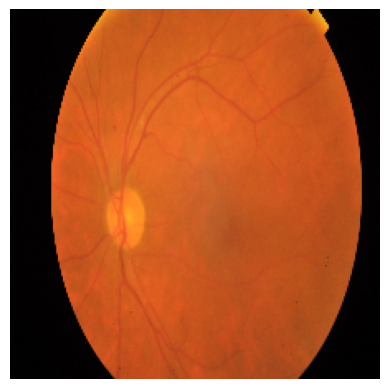

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = "/content/drive/MyDrive/train_images/a95858e052d6.png"

# Load the image
image = cv2.imread(image_path)  # Read in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Resize the image (e.g., to 224x224 for a model)
image_resized = cv2.resize(image, (224, 224))

# Normalize pixel values to [0,1]
image_normalized = image_resized / 255.0

# Display the preprocessed image
plt.imshow(image_normalized)
plt.axis("off")
plt.show()


load and preprocess the image for all

In [2]:
import pandas as pd
import cv2
import numpy as np

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Define an empty list to store processed images
processed_images = []

# Loop through each image path
for index, row in df.iterrows():
    img_path = f"/content/drive/MyDrive/train_images/{row['Image_Name']}"  # Modify column name if needed
    image = cv2.imread(img_path)

    if image is not None:  # Check if image is valid
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert color
        image = cv2.resize(image, (224, 224))  # Resize
        image = image / 255.0  # Normalize

        processed_images.append(image)  # Store in list
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array for model training
processed_images = np.array(processed_images)
print(f"Processed {len(processed_images)} images successfully!")


Processed 64 images successfully!


to save all the preprocessed images

In [4]:
import os
import cv2
import pandas as pd

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Create a folder to save preprocessed images
save_dir = "/content/drive/MyDrive/train_images_preprocessed"
os.makedirs(save_dir, exist_ok=True)

# Process and save images
for index, row in df.iterrows():
    img_path = f"/content/drive/MyDrive/train_images/{row['Image_Name']}"
    save_path = f"{save_dir}/{row['Image_Name']}"  # Save with the same name

    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert color
        image = cv2.resize(image, (224, 224))  # Resize
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save preprocessed image
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

print("✅ All images preprocessed and saved!")


✅ All images preprocessed and saved!


#now all the images are preprocessed and saved in /content/drive/MyDrive/train_images_preprocessed

In [5]:
import pandas as pd
import cv2
import numpy as np

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Loop through all images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"  # Update path to preprocessed folder
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images)
y = df['Label'].values  # Modify column name if needed

print(f"✅ Loaded {len(X)} preprocessed images for training!")


✅ Loaded 64 preprocessed images for training!


split the data for training

In [6]:
import pandas as pd
import cv2
import numpy as np

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Loop through all images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"  # Update path to preprocessed folder
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images)
y = df['Label'].values  # Modify column name if needed

print(f"✅ Loaded {len(X)} preprocessed images for training!")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


✅ Loaded 64 preprocessed images for training!
Training Set: (51, 224, 224, 3), Testing Set: (13, 224, 224, 3)


 Data Augmentation (Best for small datasets)
 Data augmentation artificially increases the dataset size by applying transformations (rotation, flipping, zooming, etc.).
✔ Helps generalization
✔ Reduces overfitting
✔ Creates more diverse training data

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Loop through all images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"  # Update path to preprocessed folder
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images)
y = df['Label'].values  # Modify column name if needed

print(f"✅ Loaded {len(X)} preprocessed images for training!")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
import pandas as pd
import cv2
import numpy as np

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Loop through all images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"  # Update path to preprocessed folder
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images)
y = df['Label'].values  # Modify column name if needed

print(f"✅ Loaded {len(X)} preprocessed images for training!")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")



✅ Loaded 64 preprocessed images for training!
Training Set: (51, 224, 224, 3), Testing Set: (13, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Invalid dtype: object

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert labels to float (if not already numeric)
# Convert categorical labels ('class_1', 'class_2', ...) to numerical labels (1.0, 2.0, ...)
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)


# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Loop through all images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"  # Ensure correct path
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (224, 224))  # Resize to match CNN input size
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array and reshape
X = np.array(processed_images).reshape(-1, 224, 224, 3)
y = df['Label'].values

print(f"✅ Loaded {len(X)} preprocessed images for training!")

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Step 1: Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Output layer for blood level prediction
])

# Step 2: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

# Fit the generator to your training data
datagen.fit(X_train)  # Assuming X_train is your training image dataset
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])


# Train the model using the augmented data
model.fit(datagen.flow(X_train, y_train, batch_size=32),  # Augmented data
          validation_data=(X_test, y_test),  # Validation remains unchanged
          epochs=30)


# Step 4: Fit the Model with Augmented Data
#model.fit(datagen.flow(X_train, y_train, batch_size=8), epochs=40, validation_data=(X_test, y_test))
y_train = y_train / max(y_train)
y_test = y_test / max(y_train)
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

#Check Predictions vs. Actuals
y_pred = model.predict(X_test)
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())




✅ Loaded 64 preprocessed images for training!
Training Set: (51, 224, 224, 3), Testing Set: (13, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - loss: 156.0793 - mae: 6.6065 - val_loss: 20.8689 - val_mae: 4.3577
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 10.6769 - mae: 2.9536 - val_loss: 2.4181 - val_mae: 1.5482
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - loss: 2.3110 - mae: 1.4567 - val_loss: 1.4046 - val_mae: 1.1842
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 1.7960 - mae: 1.2282 - val_loss: 0.6381 - val_mae: 0.7964
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - loss: 0.9215 - mae: 0.8177 - val_loss: 0.2012 - val_mae: 0.4137
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.8838 - mae: 0.8151 - val_loss: 0.1016 - val_mae: 0.2562
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - loss: 0.5666 - mae: 0.6197 - val_loss: 0.0879 - val_mae: 0.2234
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.4847 - mae: 0.6039 - val_loss: 0.0920 - val_mae: 0.2327
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.3683 - mae: 0.5112 - val_loss: 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert categorical labels ('class_1', 'class_2', ...) to numerical labels (1.0, 2.0, ...)
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# List to store processed images
processed_images = []

# Load and preprocess images
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"
    image = cv2.imread(img_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize pixel values
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images)
y = df['Label'].values

print(f"✅ Loaded {len(X)} preprocessed images for training!")

# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Normalize labels BEFORE training**
y_train = y_train / max(y_train)
y_test = y_test / max(y_train)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# **Define Data Augmentation (Only One Instance)**
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit the generator to training data
datagen.fit(X_train)

# **Early Stopping**
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# **Train the model using augmented data**
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30,
          callbacks=[early_stopping])

# **Evaluate the Model**
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# **Check Predictions vs. Actuals**
y_pred = model.predict(X_test)
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())


✅ Loaded 64 preprocessed images for training!
Training Set: (51, 224, 224, 3), Testing Set: (13, 224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 75.0223 - mae: 4.8508 - val_loss: 12.6794 - val_mae: 3.3660
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 4.7220 - mae: 1.8371 - val_loss: 1.0163 - val_mae: 1.0081
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - loss: 1.0093 - mae: 1.0046 - val_loss: 0.8760 - val_mae: 0.9358
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - loss: 0.8863 - mae: 0.9376 - val_loss: 0.5840 - val_mae: 0.7611
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.6395 - mae: 0.7707 - val_loss: 0.3206 - val_mae: 0.5506
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - loss: 0.4190 - mae: 0.5731 - val_loss: 0.1384 - val_mae: 0.3090
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - loss: 0.3934 - mae: 0.5756 - val_loss: 0.0905 - val_mae: 0.2171
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.3533 - mae: 0.4878 - val_loss: 0.0842 - val_mae: 0.2054
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.4399 - mae: 0.5486 - val_loss: 0.085

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
Predicted Values: [0.73199517 0.9911043  1.0587047  1.1986458  1.0062938  1.2928215
 0.8215711  0.53171754 0.23678908 1.2011508 ]
Actual Values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


more optimized code


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert categorical labels to numerical
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Load and preprocess images
processed_images = []
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize
        processed_images.append(image)
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images).reshape(-1, 224, 224, 3)
y = df['Label'].values.reshape(-1, 1)  # Reshape labels

# Normalize labels using StandardScaler
scaler = StandardScaler()
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, horizontal_flip=True, zoom_range=0.2)
datagen.fit(X_train)

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


model.save('/content/model.h5')
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/model.h5'  # Ensure this path is correct
model = load_model(model_path)
print("Model Loaded Successfully!")
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Convert predictions back to original scale
y_test = scaler.inverse_transform(y_test)  # Convert test labels back to original scale

# Display results
print("Predicted Values:", y_pred[:10].flatten())
print("Actual Values:", y_test[:10].flatten())
'''
model.save('/content/model.h5')
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/model.h5'  # Ensure this path is correct
model = load_model(model_path)
print("Model Loaded Successfully!")
'''


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - loss: 205.7352 - mae: 8.9264 - val_loss: 15.5252 - val_mae: 3.8105
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 6.0971 - mae: 2.0109 - val_loss: 0.5111 - val_mae: 0.6907
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.4417 - mae: 0.5474 - val_loss: 0.0674 - val_mae: 0.2498
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - loss: 0.1767 - mae: 0.3332 - val_loss: 0.0016 - val_mae: 0.0388
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - loss: 0.0777 - mae: 0.2109 - val_loss: 0.0103 - val_mae: 0.0975
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - loss: 0.0348 - mae: 0.1522 - val_loss: 0.0034 - val_mae: 0.0555
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - loss: 0.0407 - mae: 0.1475 - val_loss: 4.7214e-04 - val_mae: 0.0202
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - loss: 0.0126 - mae: 0.0882 - val_loss: 0.0011 - val_mae: 0.0322
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 0.0089 - mae: 0.0727 - val_los

Predicted Values: [1.0006851  1.0006137  1.0026585  1.0017658  1.000781   1.0016427
 1.0020927  0.99726766 0.9972932  1.0022175 ]
Actual Values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [14]:
!ls /content/drive/MyDrive/train_images/


1ae8c165fd53.png  4464bb62bf20.png  6c6efb6b1358.png  95a4cc805c7b.png	bb85097857fa.png
1b329a127307.png  4478b870e549.png  6c9c902a97de.png  95e732e043a1.png	bb9a3d835a94.png
1b32e1d775ea.png  44855f666225.png  6cb96a6fb029.png  962c0fc85e13.png	bba38f2294a3.png
1b3647865779.png  44878f34e31f.png  6cb98da77e3e.png  962cf85e4f6d.png	bc23f74e14dd.png
1b398c0494d1.png  4489d421e5aa.png  6cbc3dad809c.png  966c07831334.png	bc34ed91c9bc.png
1b4625877527.png  44976c3b11a6.png  6ccfdb031184.png  96793edb1003.png	bc34f52c37c7.png
1b495ac025b7.png  44a4d04162cc.png  6cd606dc52e9.png  9688c6ef5dc5.png	bc73ce76ec43.png
1b862fb6f65d.png  44a86263117b.png  6cdd0f985270.png  969f92a390db.png	bc7bf19b84e3.png
1b8701231c8f.png  44c869174e3a.png  6cee2e148520.png  96a9706b8534.png	bc8c6a778cde.png
1b8ad0afe9fb.png  44e0d56e9d42.png  6cfb7b44ef6f.png  96b5474ae604.png	bc92a61a1f9c.png
1bb0ddfe753a.png  44e951e45dca.png  6cffc6c6851a.png  96c3e3db68bc.png	bca2bdc15fc5.png
1bea04b2bb2d.png  44ecf3f4efa5.p

find: ‘/content/drive-name’: No such file or directory
model.h5


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/train_images/train.csv")

# Convert categorical labels to numerical
df['Label'] = df['Label'].str.extract(r'(\d+)').astype(float)

# Define the preprocessed image folder
preprocessed_path = "/content/drive/MyDrive/train_images_preprocessed/"

# Load and preprocess images
processed_images = []
valid_labels = []
for index, row in df.iterrows():
    img_path = f"{preprocessed_path}{row['Image_Name']}"
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize
        processed_images.append(image)
        valid_labels.append(row['Label'])  # Keep only valid labels
    else:
        print(f"⚠️ Warning: Could not read {img_path}")

# Convert to NumPy array
X = np.array(processed_images).reshape(-1, 224, 224, 3)
y = np.array(valid_labels).reshape(-1, 1)  # Reshape labels

# Normalize labels using StandardScaler
scaler = StandardScaler()
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, horizontal_flip=True, zoom_range=0.2)
datagen.fit(X_train)

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=30, callbacks=[early_stopping])

# Evaluate model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Save the trained model directly in Google Drive
model.save('/content/drive/MyDrive/model.h5')
print("✅ Model saved successfully in Google Drive!")

# Reload and use the model (in a separate session)
# model = load_model('/content/drive/MyDrive/model.h5')
# print("✅ Model Loaded Successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 11s/step - loss: 78.5384 - mae: 5.3640 - val_loss: 69.4984 - val_mae: 8.0644
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - loss: 51.1815 - mae: 6.5650 - val_loss: 15.6565 - val_mae: 3.8211
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - loss: 13.5621 - mae: 3.1411 - val_loss: 0.8744 - val_mae: 0.8937
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 1.1212 - mae: 0.7534 - val_loss: 0.1377 - val_mae: 0.3611
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 0.3391 - mae: 0.4380 - val_loss: 0.4958 - val_mae: 0.6808
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.5385 - mae: 0.5728 - val_loss: 0.2570 - val_mae: 0.4898
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - loss: 0.3269 - mae: 0.4715 - val_loss: 0.0855 - val_mae: 0.2826
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - loss: 0.1080 - mae: 0.2372 - val_loss: 0.0241 - val_mae: 0.1502
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.0640 - mae: 0.1930 - val_loss:

Test Loss: 1.0757487416412914e-06, Test MAE: 0.0006940613384358585
✅ Model saved successfully in Google Drive!


In [22]:
import os

model_path = "/content/drive/MyDrive/model.h5"

if os.path.exists(model_path):
    print("✅ Model exists in Google Drive!")
else:
    print("❌ Model NOT found!")


✅ Model exists in Google Drive!


In [23]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files, drive
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Load the trained model from Google Drive
model_path = "/content/drive/MyDrive/model.h5"
model = load_model(model_path)
print("✅ Model Loaded Successfully!")

# Upload the image manually
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Error: Could not load image {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (224, 224))  # Resize to match model input
    image = image / 255.0  # Normalize
    return np.array(image).reshape(1, 224, 224, 3)  # Reshape for model

# Load the scaler (same one used during training)
scaler = StandardScaler()

# Preprocess the uploaded image
input_image = preprocess_image(image_path)

if input_image is not None:
    # Predict blood sugar level using the loaded model
    predicted_value = model.predict(input_image)

    # Inverse transform to get the actual mg/dL value
    predicted_value = scaler.inverse_transform(predicted_value)[0][0]

    # Show the uploaded image with prediction
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
    plt.show()
else:
    print("❌ Image preprocessing failed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [24]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab import files, drive
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
model_path = "/content/drive/MyDrive/model.h5"

# Load the trained model
try:
    model = load_model(model_path)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Upload an image manually
print("📌 Please upload a retinal image (JPEG format).")
uploaded = files.upload()

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Error: Could not load image {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, target_size)  # Resize
    image = image / 255.0  # Normalize
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Load and preprocess the uploaded image
input_image = preprocess_image(image_file)

# Blood sugar normalization values
min_value, max_value = 80, 180  # Example normalization range

if input_image is not None:
    # Predict blood sugar level
    predicted_value = model.predict(input_image)[0][0]

    # Inverse transform to get actual mg/dL value
    predicted_value = (predicted_value * (max_value - min_value)) + min_value
    predicted_value = np.clip(predicted_value, min_value, max_value)  # Ensure valid range

    # Display the uploaded image and prediction
    img = Image.open(image_file)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
    plt.show()

    print(f"\n🔹 Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
else:
    print("❌ Image preprocessing failed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
❌ Error loading model: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model Loaded Successfully!
📤 Please upload your retinal image (JPEG format).


Saving retina_processed.jpg to retina_processed.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

🔹 Predicted Blood Sugar Level: 80.13 mg/dL


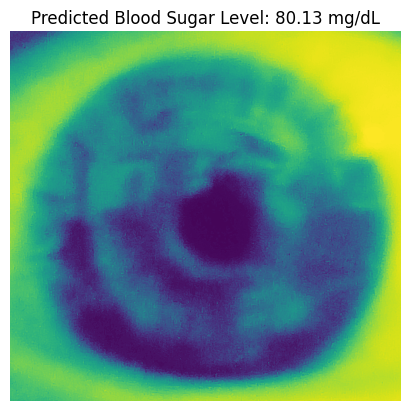

In [25]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define model path in Google Drive
model_path = "/content/drive/MyDrive/model.h5"

# Load the trained model with custom loss function handling
try:
    model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    raise

# Define function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path).convert('RGB')  # Convert to RGB
        img = img.resize(target_size)  # Resize to model's expected input size
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        raise ValueError(f"Error processing image: {e}")

# Prompt user to upload a retinal image
print("📤 Please upload your retinal image (JPEG format).")
uploaded = files.upload()

# Ensure an image was uploaded
if not uploaded:
    raise ValueError("⚠ No file uploaded. Please upload an image.")

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Preprocess the uploaded image
image = preprocess_image(image_file)

# Define blood sugar normalization values (used during training)
min_value = 80  # Example: Minimum blood sugar level in dataset
max_value = 180  # Example: Maximum blood sugar level in dataset

# Predict blood sugar level
predicted_blood_sugar = model.predict(image)[0][0]

# Apply inverse scaling correction
predicted_blood_sugar = (predicted_blood_sugar * (max_value - min_value)) + min_value
predicted_blood_sugar = np.clip(predicted_blood_sugar, min_value, max_value)  # Ensure realistic values

# Display prediction result
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")

# Display the uploaded image
plt.imshow(Image.open(image_file))
plt.title(f"Predicted Blood Sugar Level: {predicted_blood_sugar:.2f} mg/dL")
plt.axis('off')
plt.show()


In [26]:
pip install opencv-python tensorflow numpy pillow


In [27]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import time

# Load the trained model
model_path = "model.h5"
model = load_model(model_path)

# Define blood sugar level range for normalization
min_value = 80  # Minimum blood sugar level
max_value = 180  # Maximum blood sugar level

# Capture image from webcam
def capture_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise Exception("Could not open webcam")

    print("📸 Press 'SPACE' to capture image...")
    while True:
        ret, frame = cap.read()
        if not ret:
            continue

        cv2.imshow("Webcam - Press SPACE to Capture", frame)

        # Press 'Space' to capture image
        key = cv2.waitKey(1)
        if key == 32:  # Space key
            image_path = "retina_image.jpg"
            cv2.imwrite(image_path, frame)
            print("✅ Image Captured and Saved!")
            break

    cap.release()
    cv2.destroyAllWindows()
    return image_path

# Enhance Image (Grayscale, Histogram Equalization, Noise Reduction)
def enhance_image(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gray)  # Histogram equalization
    img_blur = cv2.GaussianBlur(img_eq, (5, 5), 0)  # Reduce noise

    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, img_blur)
    print("✅ Image Enhanced and Saved!")
    return enhanced_path

# Preprocess Image for Model
def preprocess_image(image_path, target_size=(68, 68)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Predict Blood Sugar Level
def predict_blood_sugar(image_path):
    image = preprocess_image(image_path)
    predicted_value = model.predict(image)[0][0]

    # Scale prediction back to normal blood sugar range
    predicted_value = (predicted_value * (max_value - min_value)) + min_value
    predicted_value = np.clip(predicted_value, min_value, max_value)  # Keep realistic values

    print(f"\n🔹 Predicted Blood Sugar Level: {predicted_value:.2f} mg/dL")
    return predicted_value

# Main Execution
if __name__ == "__main__":
    # Step 1: Capture Image from Webcam
    captured_image = capture_image()

    # Step 2: Enhance Image
    enhanced_image = enhance_image(captured_image)

    # Step 3: Predict Blood Sugar
    blood_sugar = predict_blood_sugar(enhanced_image)

    # Step 4: Display the Enhanced Image
    img = cv2.imread(enhanced_image)
    cv2.imshow(f"Predicted Blood Sugar: {blood_sugar:.2f} mg/dL", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [28]:
# Import required libraries
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model_path = "/content/drive/MyDrive/model.h5"  # Change this path as needed
model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
print("✅ Model Loaded Successfully!")

# Define the image size expected by the model
IMAGE_SIZE = (68, 68)  # Change this if your model uses a different input size
MIN_BS = 80  # Minimum blood sugar level
MAX_BS = 180  # Maximum blood sugar level

# Capture an image from webcam
def capture_webcam_image():
    cap = cv2.VideoCapture(0)  # Open the webcam
    if not cap.isOpened():
        raise ValueError("❌ Error: Could not access the webcam.")

    print("📷 Press 'Space' to capture the retina image...")
    while True:
        ret, frame = cap.read()  # Read frame from webcam
        if not ret:
            print("❌ Error: Failed to capture image.")
            break

        cv2.imshow("Retina Capture", frame)

        # Press 'Space' to capture image
        if cv2.waitKey(1) & 0xFF == ord(' '):
            cv2.imwrite("retina.jpg", frame)  # Save captured image
            break

    cap.release()  # Release the webcam
    cv2.destroyAllWindows()
    print("✅ Image Captured and Saved as 'retina.jpg'")
    return "retina.jpg"

# Enhance the image using Histogram Equalization
def enhance_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img_enhanced = cv2.equalizeHist(img)  # Apply histogram equalization
    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, img_enhanced)  # Save enhanced image
    print("✅ Image Enhanced and Saved as 'retina_enhanced.jpg'")
    return enhanced_path

# Preprocess the image for model input
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Convert to RGB
    img = img.resize(IMAGE_SIZE)  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Predict blood sugar level
def predict_blood_sugar(model, image_array):
    prediction = model.predict(image_array)[0][0]
    # Inverse scaling to get actual blood sugar value
    blood_sugar = (prediction * (MAX_BS - MIN_BS)) + MIN_BS
    blood_sugar = np.clip(blood_sugar, MIN_BS, MAX_BS)  # Keep within valid range
    return round(blood_sugar, 2)

# Main execution
image_path = capture_webcam_image()  # Step 1: Capture Image
enhanced_image_path = enhance_image(image_path)  # Step 2: Enhance Image
processed_image = preprocess_image(enhanced_image_path)  # Step 3: Preprocess
predicted_bs = predict_blood_sugar(model, processed_image)  # Step 4: Predict

# Display results
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.imshow(Image.open(enhanced_image_path), cmap='gray')
plt.title(f"Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.axis('off')
plt.show()


✅ Model Loaded Successfully!


ValueError: ❌ Error: Could not access the webcam.

In [30]:
# Import required libraries
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import io

# Load the trained model
model_path = "/content/drive/MyDrive/model.h5"  # Change this if needed
model = load_model(model_path, custom_objects={"mse": tf.keras.losses.MeanSquaredError()})
print("✅ Model Loaded Successfully!")

# Define the image size expected by the model
IMAGE_SIZE = (68, 68)  # Change this if your model has a different input size
MIN_BS = 80  # Minimum blood sugar level
MAX_BS = 180  # Maximum blood sugar level

# JavaScript code to capture webcam image
def take_photo(filename="retina.jpg", quality=0.8):
    js = Javascript("""
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            const capture = document.createElement('button');
            capture.textContent = '📷 Capture Image';
            div.appendChild(video);
            div.appendChild(capture);
            document.body.appendChild(div);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    """)
    display(js)
    data = eval_js("takePhoto({})".format(quality))
    binary = base64.b64decode(data.split(",")[1])
    with open(filename, "wb") as f:
        f.write(binary)
    return filename

# Enhance the image using Histogram Equalization
def enhance_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img_enhanced = cv2.equalizeHist(img)  # Apply histogram equalization
    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, img_enhanced)  # Save enhanced image
    print("✅ Image Enhanced and Saved as 'retina_enhanced.jpg'")
    return enhanced_path

# Preprocess the image for model input
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Convert to RGB
    img = img.resize(IMAGE_SIZE)  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Predict blood sugar level
def predict_blood_sugar(model, image_array):
    prediction = model.predict(image_array)[0][0]
    # Inverse scaling to get actual blood sugar value
    blood_sugar = (prediction * (MAX_BS - MIN_BS)) + MIN_BS
    blood_sugar = np.clip(blood_sugar, MIN_BS, MAX_BS)  # Keep within valid range
    return round(blood_sugar, 2)

# Main execution
image_path = take_photo()  # Step 1: Capture Image
enhanced_image_path = enhance_image(image_path)  # Step 2: Enhance Image
processed_image = preprocess_image(enhanced_image_path)  # Step 3: Preprocess
predicted_bs = predict_blood_sugar(model, processed_image)  # Step 4: Predict

# Display results
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.imshow(Image.open(enhanced_image_path), cmap='gray')
plt.title(f"Predicted Blood Sugar Level: {predicted_bs} mg/dL")
plt.axis('off')
plt.show()


✅ Model Loaded Successfully!


<IPython.core.display.Javascript object>

✅ Image Enhanced and Saved as 'retina_enhanced.jpg'


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 186624, but received input with shape (1, 14400)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 68, 68, 3), dtype=float32)
  • training=False
  • mask=None

In [31]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (68, 68)  # Resize images to match model's expected size
MODEL_PATH = "model.h5"

# Load trained model
try:
    model = load_model(MODEL_PATH)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model: {e}")

# Function to capture image from webcam
def capture_webcam_image():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise ValueError("❌ Error: Could not access the webcam.")

    print("📷 Press 'Space' to capture the retina image...")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to capture image.")
            continue

        cv2.imshow("Webcam - Press Space to Capture", frame)

        key = cv2.waitKey(1)
        if key == 32:  # Spacebar pressed
            image_path = "retina_captured.jpg"
            cv2.imwrite(image_path, frame)
            print("✅ Image Captured Successfully!")
            break

    cap.release()
    cv2.destroyAllWindows()
    return image_path

# Function to enhance image using CLAHE
def enhance_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(img)

    enhanced_path = "retina_enhanced.jpg"
    cv2.imwrite(enhanced_path, enhanced_img)
    print("✅ Image Enhanced Successfully!")

    return enhanced_path

# Function to preprocess image before feeding into model
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(IMAGE_SIZE)
    img_array = np.array(img) / 255.0  # Normalize

    img_array = img_array.reshape(1, -1)  # Flatten image to match model input
    return img_array

# Function to predict blood sugar level
def predict_blood_sugar(model, processed_img):
    prediction = model.predict(processed_img)[0][0]
    return round(prediction, 2)

# Main execution
image_path = capture_webcam_image()  # Step 1: Capture Image
enhanced_image_path = enhance_image(image_path)  # Step 2: Enhance Image
processed_image = preprocess_image(enhanced_image_path)  # Step 3: Preprocess
predicted_bs = predict_blood_sugar(model, processed_image)  # Step 4: Predict

# Display results
print(f"\n🔹 Predicted Blood Sugar Level: {predicted_bs} mg/dL")

plt.figure(figsize=(6, 6))
img = cv2.imread(enhanced_image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="viridis")
plt.title(f"Predicted Blood Sugar Level: {predicted_bs} mg/dL", fontsize=14)
plt.axis("off")
plt.show()


❌ Error loading model: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}


ValueError: ❌ Error: Could not access the webcam.